In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
type(model)

sklearn.linear_model._base.LinearRegression

In [4]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Hotel_Room.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,115,https://www.airbnb.com/rooms/617137,2024-09-26,No contiene descripción,https://www.airbnb.com/users/show/3059169,2012-07-26,within an hour,No contiene host_response_rate,No contiene host_acceptance_rate,f,...,4.76,4.84,4.83,4.85,1.0,0.0,0.0,0.0,1.74,4
1,258,https://www.airbnb.com/rooms/3197924,2024-09-26,"double bed , full bathroom, room with own terr...",https://www.airbnb.com/users/show/16186468,2014-05-30,a few days or more,0%,0%,f,...,4.76,4.84,4.83,4.85,3.0,1.0,1.0,0.0,1.74,4


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

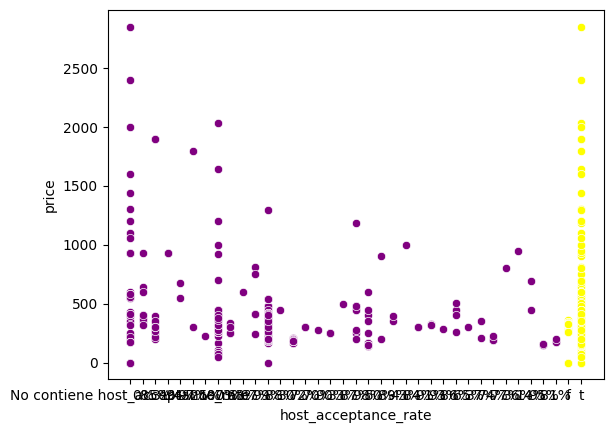

In [5]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [6]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [7]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [8]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-76.14972397]),
 'rank_': 1,
 'singular_': array([7.88474748]),
 'intercept_': np.float64(414.93052475925026)}

In [9]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([414.93052476, 414.93052476, 350.20325938, 391.32411033,
       343.34978423, 414.93052476, 341.06529251, 414.93052476,
       391.32411033, 395.89309377, 338.78080079, 414.93052476,
       359.34122626, 359.34122626, 414.93052476, 414.93052476,
       338.78080079, 414.93052476, 414.93052476, 414.93052476,
       366.95619866, 414.93052476, 363.9102097 , 414.93052476,
       414.93052476, 414.93052476, 414.93052476, 363.9102097 ,
       414.93052476, 339.54229803, 339.54229803, 339.54229803,
       339.54229803, 339.54229803, 338.78080079, 347.91876766,
       339.54229803, 338.78080079, 343.34978423, 339.54229803,
       339.54229803, 339.54229803, 339.54229803, 339.54229803,
       414.93052476, 414.93052476, 414.93052476, 414.93052476,
       414.93052476, 414.93052476, 338.78080079, 338.78080079,
       338.78080079, 338.78080079, 414.93052476, 341.06529251,
       414.93052476, 338.78080079, 339.54229803, 339.54229803,
       339.54229803, 414.93052476, 414.93052476, 350.20

In [10]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,414.930525,115,https://www.airbnb.com/rooms/617137,2024-09-26,No contiene descripción,https://www.airbnb.com/users/show/3059169,2012-07-26,within an hour,No contiene host_response_rate,0.00,...,4.76,4.84,4.83,4.85,1.0,0.0,0.00,0.0,1.74,4
1,414.930525,258,https://www.airbnb.com/rooms/3197924,2024-09-26,"double bed , full bathroom, room with own terr...",https://www.airbnb.com/users/show/16186468,2014-05-30,a few days or more,0%,0.00,...,4.76,4.84,4.83,4.85,3.0,1.0,1.00,0.0,1.74,4
2,350.203259,366,https://www.airbnb.com/rooms/5434219,2024-09-26,Single Room $30<br />Double room $60<br />Dorm...,https://www.airbnb.com/users/show/28190065,2015-02-22,within a few hours,100%,0.85,...,4.86,4.92,4.92,4.92,2.0,0.0,1.00,0.0,0.30,4
3,391.324110,444,https://www.airbnb.com/rooms/6972071,2024-09-25,Welcome to the best college-style dorms in a B...,https://www.airbnb.com/users/show/35406862,2015-06-09,within a few hours,100%,0.31,...,4.76,4.84,4.83,4.85,19.0,2.0,0.74,0.0,1.74,4
4,343.349784,456,https://www.airbnb.com/rooms/6076798,2024-09-25,It has all the comforts to rest if you come fo...,https://www.airbnb.com/users/show/31426842,2015-04-17,within a few hours,100%,0.94,...,4.93,4.94,4.91,4.92,1.0,0.0,0.00,0.0,0.75,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,338.780801,26261,https://www.airbnb.com/rooms/1239163343779403019,2024-09-25,This bedroom is ideal for a full family or a g...,https://www.airbnb.com/users/show/63557308,2016-03-19,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,4.0,0.0,3.00,0.0,1.74,4
397,338.780801,26336,https://www.airbnb.com/rooms/1245764268727921299,2024-09-25,IOW4 LV STUDIO© CONCEPT TO SHARE TRIPS IN STAN...,https://www.airbnb.com/users/show/244230249,2019-02-19,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,4.0,0.0,1.00,0.0,1.74,4
398,338.780801,26371,https://www.airbnb.com/rooms/1246455131724928238,2024-09-25,IOW4 LV WONDERFUL© CONCEPT TO SHARE TRIPS IN S...,https://www.airbnb.com/users/show/244230249,2019-02-19,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,4.0,0.0,1.00,0.0,1.74,4
399,414.930525,26447,https://www.airbnb.com/rooms/1248058667744084823,2024-09-25,Disconnect from your concerns in this spacious...,https://www.airbnb.com/users/show/652641401,2024-09-17,within an hour,No contiene host_response_rate,0.00,...,5.00,5.00,5.00,5.00,1.0,0.0,0.00,0.0,1.00,4


In [11]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.007531490585012346

In [12]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.08678416091091937)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

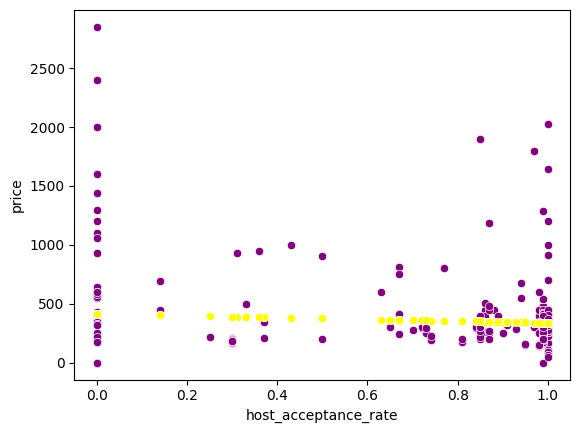

In [13]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [14]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_24128\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [15]:
df['room_type'] = 1

In [16]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

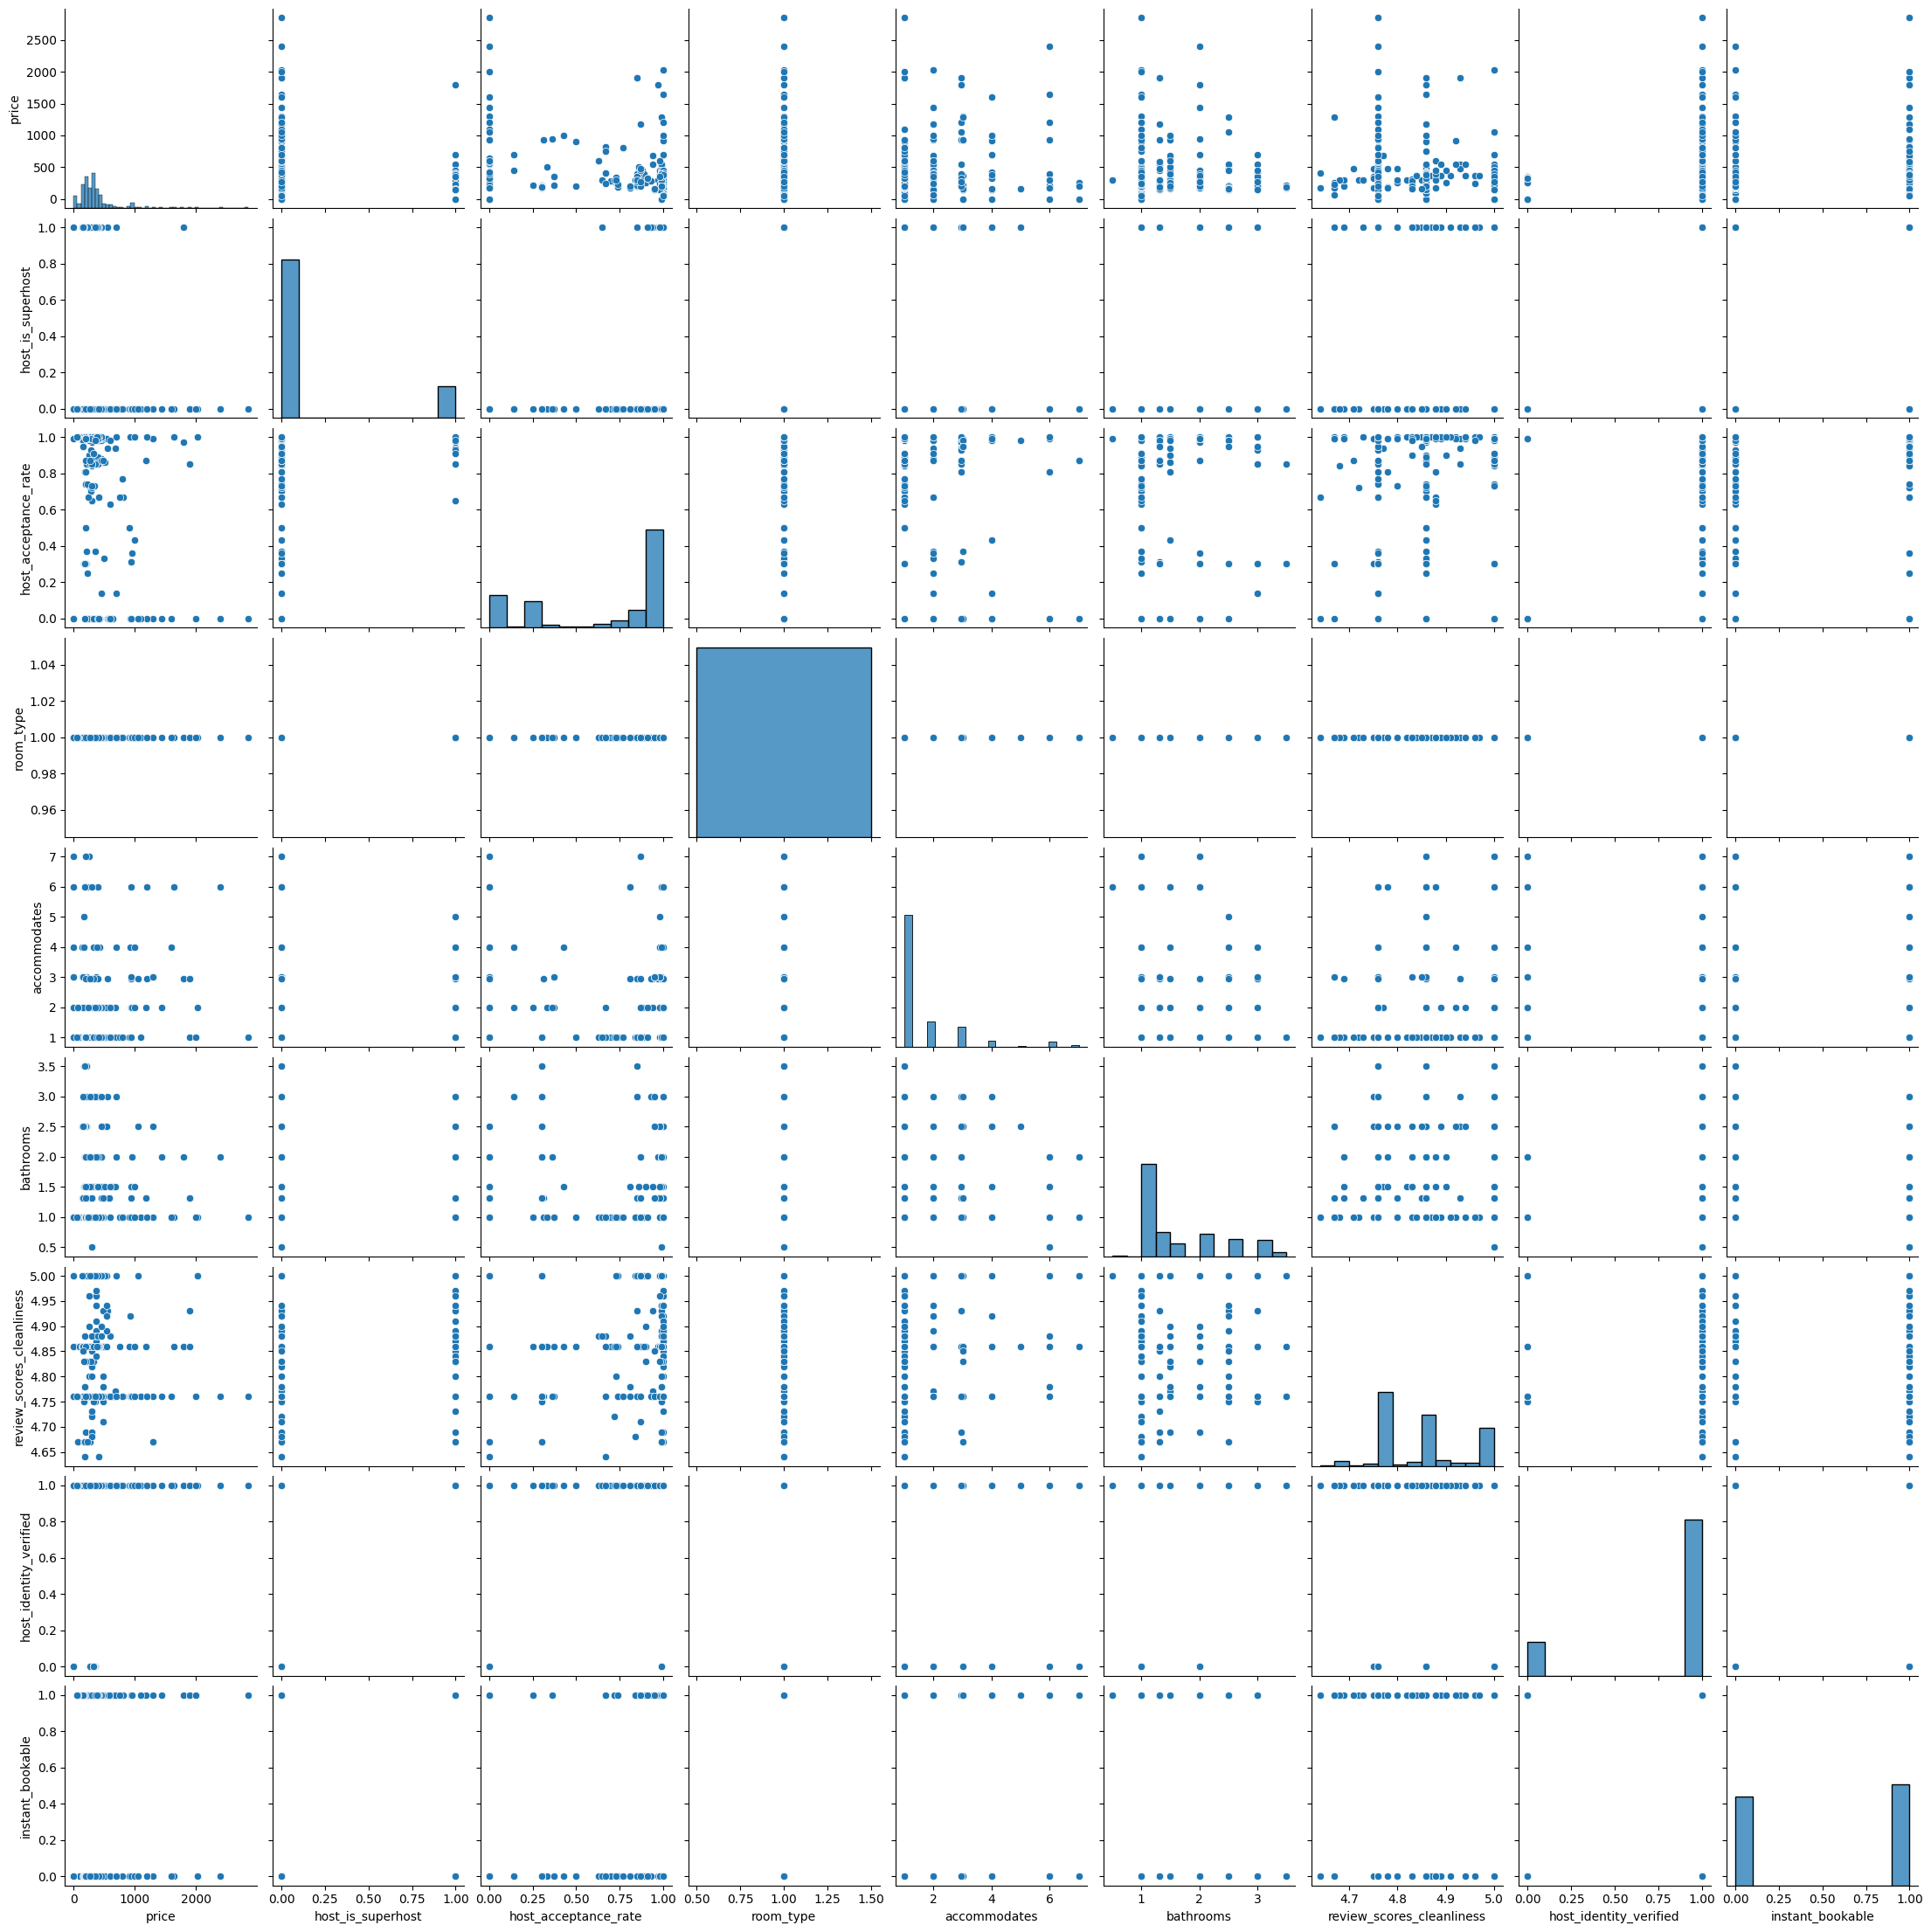

In [17]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [18]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,-0.079909,-0.086784,NaN,0.173599,-0.103129,-0.042658,0.194029,0.092293
host_is_superhost,-0.079909,1.000000,0.343941,NaN,0.052452,-0.007274,0.188297,0.207748,0.177475
host_acceptance_rate,-0.086784,0.343941,1.000000,NaN,-0.057644,0.043535,0.313960,0.010524,0.546917
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.173599,0.052452,-0.057644,NaN,1.000000,0.081647,-0.024059,0.083208,-0.082334
bathrooms,-0.103129,-0.007274,0.043535,NaN,0.081647,1.000000,0.071524,0.253794,-0.080665
review_scores_cleanliness,-0.042658,0.188297,0.313960,NaN,-0.024059,0.071524,1.000000,0.099829,0.073702
host_identity_verified,0.194029,0.207748,0.010524,NaN,0.083208,0.253794,0.099829,1.000000,-0.132394
instant_bookable,0.092293,0.177475,0.546917,NaN,-0.082334,-0.080665,0.073702,-0.132394,1.000000


In [19]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.079909,0.086784,NaN,0.173599,0.103129,0.042658,0.194029,0.092293
host_is_superhost,0.079909,1.000000,0.343941,NaN,0.052452,0.007274,0.188297,0.207748,0.177475
host_acceptance_rate,0.086784,0.343941,1.000000,NaN,0.057644,0.043535,0.313960,0.010524,0.546917
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.173599,0.052452,0.057644,NaN,1.000000,0.081647,0.024059,0.083208,0.082334
bathrooms,0.103129,0.007274,0.043535,NaN,0.081647,1.000000,0.071524,0.253794,0.080665
review_scores_cleanliness,0.042658,0.188297,0.313960,NaN,0.024059,0.071524,1.000000,0.099829,0.073702
host_identity_verified,0.194029,0.207748,0.010524,NaN,0.083208,0.253794,0.099829,1.000000,0.132394
instant_bookable,0.092293,0.177475,0.546917,NaN,0.082334,0.080665,0.073702,0.132394,1.000000


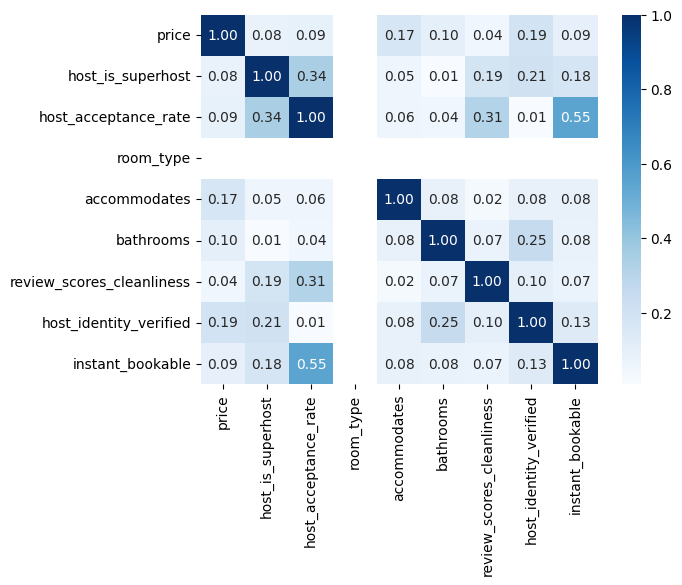

In [20]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

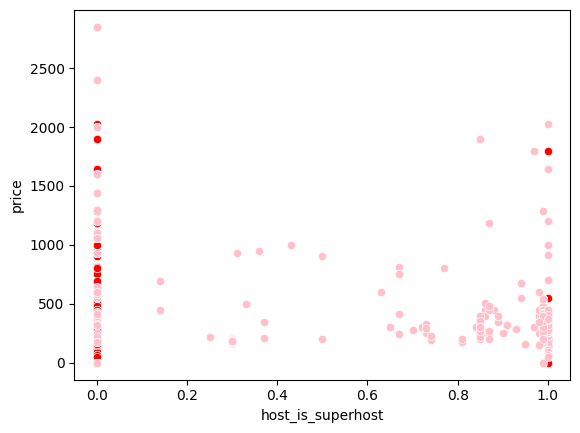

In [21]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [22]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [23]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-74.00701135]),
 'rank_': 1,
 'singular_': array([7.47030697]),
 'intercept_': np.float64(375.6488023952096)}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.006385447251648357

In [26]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([375.6488024 , 375.6488024 , 301.64179104, 375.6488024 ,
       301.64179104, 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 301.64179104,
       375.6488024 , 375.6488024 , 375.6488024 , 375.6488024 ,
       375.6488024 , 375.6488024 , 375.6488024 , 375.64

In [27]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,375.648802,0.0,0,0.00,1,2.00,1.00,4.76,0,0
1,375.648802,640.0,0,0.00,1,1.00,1.50,4.76,1,1
2,301.641791,290.0,1,0.85,1,2.94,1.32,4.86,1,0
3,375.648802,932.7,0,0.31,1,2.94,1.32,4.76,1,0
4,301.641791,550.0,1,0.94,1,2.94,3.00,4.93,1,1
...,...,...,...,...,...,...,...,...,...,...
396,375.648802,1200.0,0,1.00,1,6.00,1.00,4.76,1,0
397,375.648802,70.0,0,1.00,1,2.00,1.00,4.76,1,1
398,375.648802,70.0,0,1.00,1,2.00,1.00,4.76,1,1
399,375.648802,1058.0,0,0.00,1,2.94,2.50,5.00,1,0


In [28]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.006385447251648357

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0799089935592256)

<Axes: xlabel='host_is_superhost', ylabel='price'>

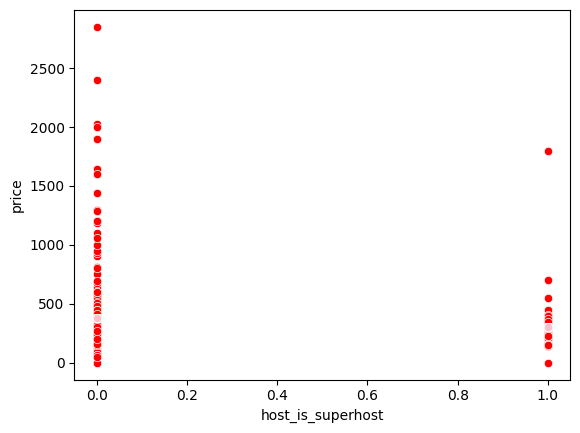

In [30]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

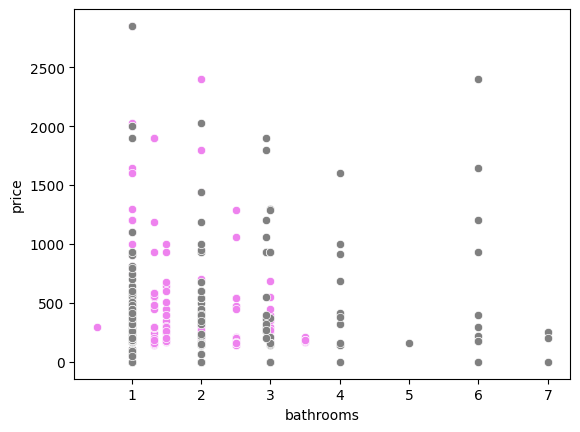

In [31]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [32]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [33]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-49.16374858]),
 'rank_': 1,
 'singular_': array([14.5128368]),
 'intercept_': np.float64(439.5596871437528)}

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.010635631786818922

In [36]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([390.39593856, 365.81406427, 374.66353901, 374.66353901,
       292.06844139, 390.39593856, 374.66353901, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 365.81406427,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 365.81406427, 365.81406427, 390.39593856,
       365.81406427, 365.81406427, 390.39593856, 390.39593856,
       365.81406427, 365.81406427, 365.81406427, 365.81406427,
       390.39593856, 365.81406427, 390.39593856, 365.81406427,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 341.23218997,
       390.39593856, 390.39593856, 390.39593856, 390.39593856,
       390.39593856, 390.39593856, 390.39593856, 374.66

In [37]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

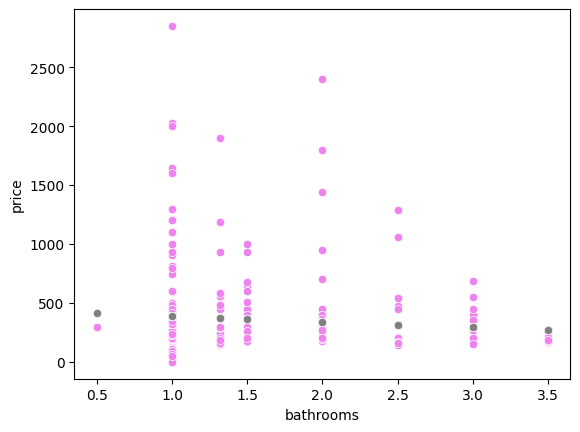

In [38]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [39]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.010635631786818922

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.103129199486949)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

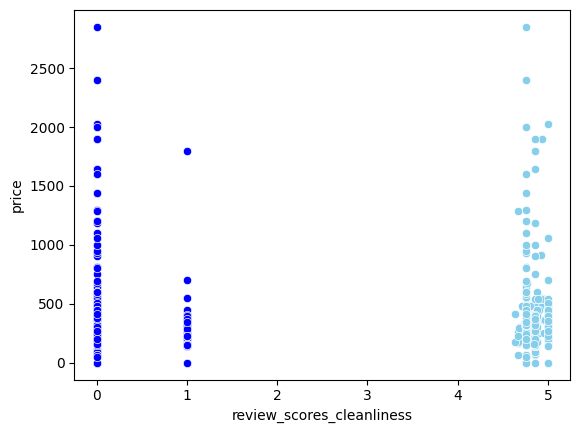

In [41]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [42]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [43]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-153.50173088]),
 'rank_': 1,
 'singular_': array([1.92267685]),
 'intercept_': np.float64(1106.679791465189)}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0018197337176418804

In [46]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([376.0115525 , 376.0115525 , 360.66137941, 376.0115525 ,
       349.91625825, 376.0115525 , 360.66137941, 376.0115525 ,
       376.0115525 , 360.66137941, 351.45127556, 376.0115525 ,
       369.87148326, 360.66137941, 376.0115525 , 376.0115525 ,
       339.17113709, 376.0115525 , 339.17113709, 376.0115525 ,
       357.59134479, 376.0115525 , 357.59134479, 376.0115525 ,
       376.0115525 , 376.0115525 , 376.0115525 , 394.4317602 ,
       376.0115525 , 360.66137941, 360.66137941, 360.66137941,
       360.66137941, 360.66137941, 360.66137941, 339.17113709,
       360.66137941, 366.80144865, 374.47653519, 360.66137941,
       389.82670828, 386.75667366, 365.26643134, 360.66137941,
       376.0115525 , 360.66137941, 376.0115525 , 376.0115525 ,
       376.0115525 , 376.0115525 , 360.66137941, 360.66137941,
       360.66137941, 389.82670828, 376.0115525 , 360.66137941,
       376.0115525 , 360.66137941, 360.66137941, 360.66137941,
       360.66137941, 376.0115525 , 376.0115525 , 349.91

In [47]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

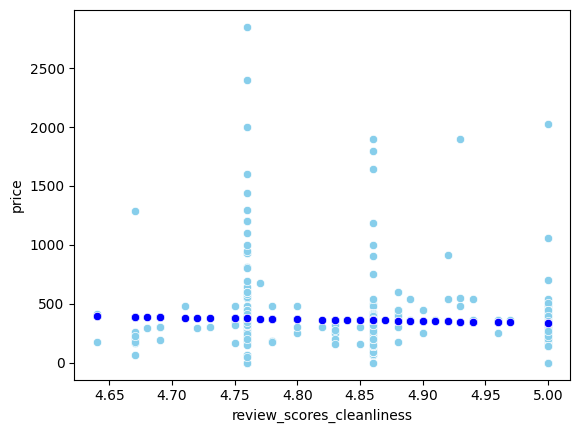

In [48]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [49]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0018197337176418804

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04265833702386768)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

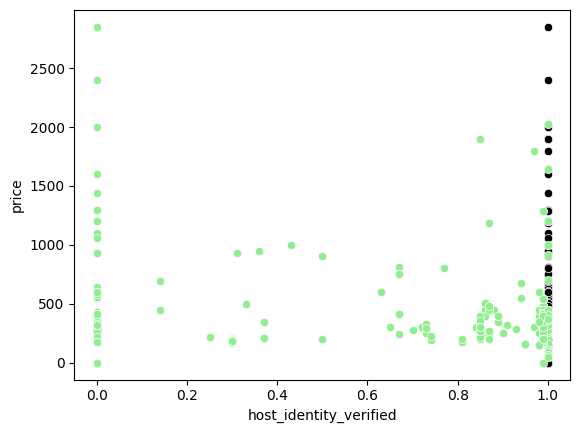

In [51]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [52]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [53]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [54]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([175.61731541]),
 'rank_': 1,
 'singular_': array([7.64388172]),
 'intercept_': np.float64(218.76056338028164)}

In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0376470781971151

In [56]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([218.76056338, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 218.76056338,
       394.37787879, 394.37787879, 218.76056338, 218.76056338,
       394.37787879, 218.76056338, 218.76056338, 218.76056338,
       394.37787879, 218.76056338, 394.37787879, 394.37787879,
       218.76056338, 394.37787879, 218.76056338, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       218.76056338, 218.76056338, 218.76056338, 218.76056338,
       218.76056338, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 394.37787879, 394.37787879,
       218.76056338, 394.37787879, 394.37787879, 394.37787879,
       394.37787879, 394.37787879, 218.76056338, 394.37

In [57]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,218.760563,376.011552,390.395939,375.648802,0.0,0,0.00,1,2.00,1.00,4.76,0,0
1,394.377879,376.011552,365.814064,375.648802,640.0,0,0.00,1,1.00,1.50,4.76,1,1
2,394.377879,360.661379,374.663539,301.641791,290.0,1,0.85,1,2.94,1.32,4.86,1,0
3,394.377879,376.011552,374.663539,375.648802,932.7,0,0.31,1,2.94,1.32,4.76,1,0
4,394.377879,349.916258,292.068441,301.641791,550.0,1,0.94,1,2.94,3.00,4.93,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,394.377879,376.011552,390.395939,375.648802,1200.0,0,1.00,1,6.00,1.00,4.76,1,0
397,394.377879,376.011552,390.395939,375.648802,70.0,0,1.00,1,2.00,1.00,4.76,1,1
398,394.377879,376.011552,390.395939,375.648802,70.0,0,1.00,1,2.00,1.00,4.76,1,1
399,394.377879,339.171137,316.650316,375.648802,1058.0,0,0.00,1,2.94,2.50,5.00,1,0


<Axes: xlabel='host_identity_verified', ylabel='price'>

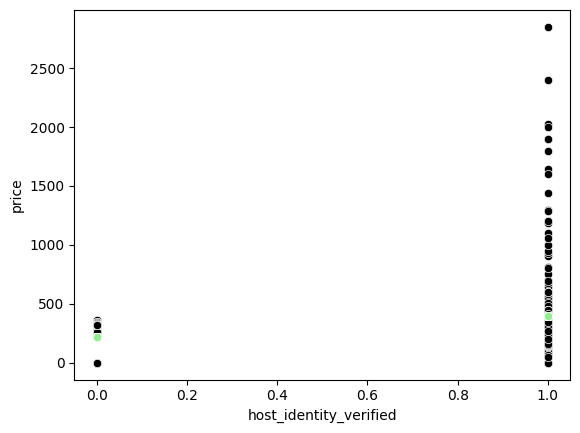

In [58]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [59]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0376470781971151

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.19402854995364754)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

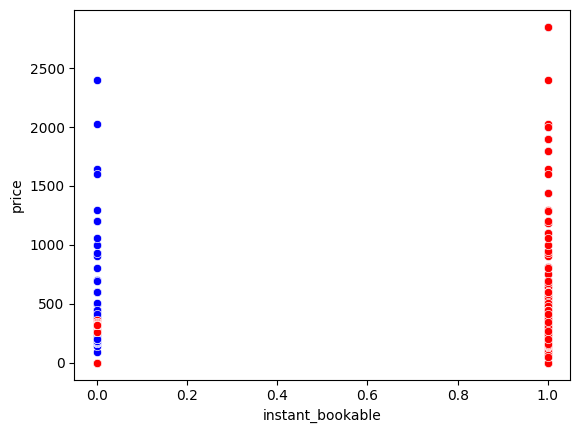

In [61]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [62]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [63]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [64]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([63.91892898]),
 'rank_': 1,
 'singular_': array([9.98977033]),
 'intercept_': np.float64(329.172192513369)}

In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00851802044599681

In [66]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([329.17219251, 393.0911215 , 329.17219251, 329.17219251,
       393.0911215 , 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 393.0911215 , 393.0911215 , 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 393.0911215 , 393.0911215 , 393.0911215 ,
       393.0911215 , 393.0911215 , 393.0911215 , 329.17219251,
       393.0911215 , 393.0911215 , 393.0911215 , 393.0911215 ,
       393.0911215 , 393.0911215 , 393.0911215 , 393.0911215 ,
       329.17219251, 329.17219251, 329.17219251, 329.17219251,
       329.17219251, 329.17219251, 393.0911215 , 393.0911215 ,
       329.17219251, 393.0911215 , 329.17219251, 393.0911215 ,
       329.17219251, 393.0911215 , 393.0911215 , 393.0911215 ,
       393.0911215 , 329.17219251, 329.17219251, 393.09

In [67]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,329.172193,218.760563,376.011552,390.395939,375.648802,0.0,0,0.00,1,2.00,1.00,4.76,0,0
1,393.091121,394.377879,376.011552,365.814064,375.648802,640.0,0,0.00,1,1.00,1.50,4.76,1,1
2,329.172193,394.377879,360.661379,374.663539,301.641791,290.0,1,0.85,1,2.94,1.32,4.86,1,0
3,329.172193,394.377879,376.011552,374.663539,375.648802,932.7,0,0.31,1,2.94,1.32,4.76,1,0
4,393.091121,394.377879,349.916258,292.068441,301.641791,550.0,1,0.94,1,2.94,3.00,4.93,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,329.172193,394.377879,376.011552,390.395939,375.648802,1200.0,0,1.00,1,6.00,1.00,4.76,1,0
397,393.091121,394.377879,376.011552,390.395939,375.648802,70.0,0,1.00,1,2.00,1.00,4.76,1,1
398,393.091121,394.377879,376.011552,390.395939,375.648802,70.0,0,1.00,1,2.00,1.00,4.76,1,1
399,329.172193,394.377879,339.171137,316.650316,375.648802,1058.0,0,0.00,1,2.94,2.50,5.00,1,0


<Axes: xlabel='instant_bookable', ylabel='price'>

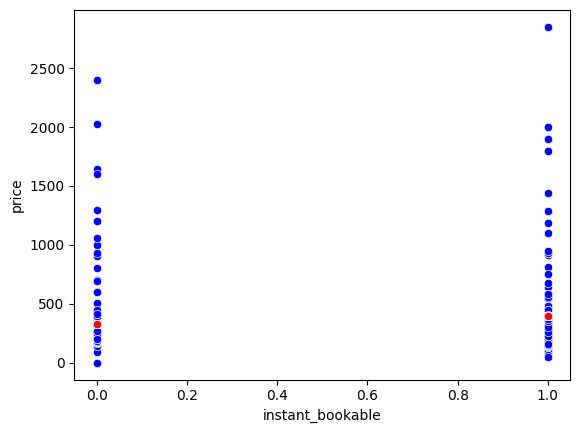

In [68]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [69]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00851802044599681

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.09229312241980336)